In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
df=pd.read_csv("D:/kaggle/competitions/cat-in-the-dat/train.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [7]:
pd.options.display.max_columns=30

In [8]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


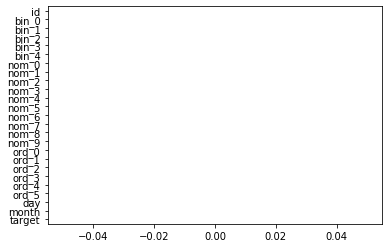

In [9]:
sn.barplot(y=list(df.columns),x=df.isna().sum())

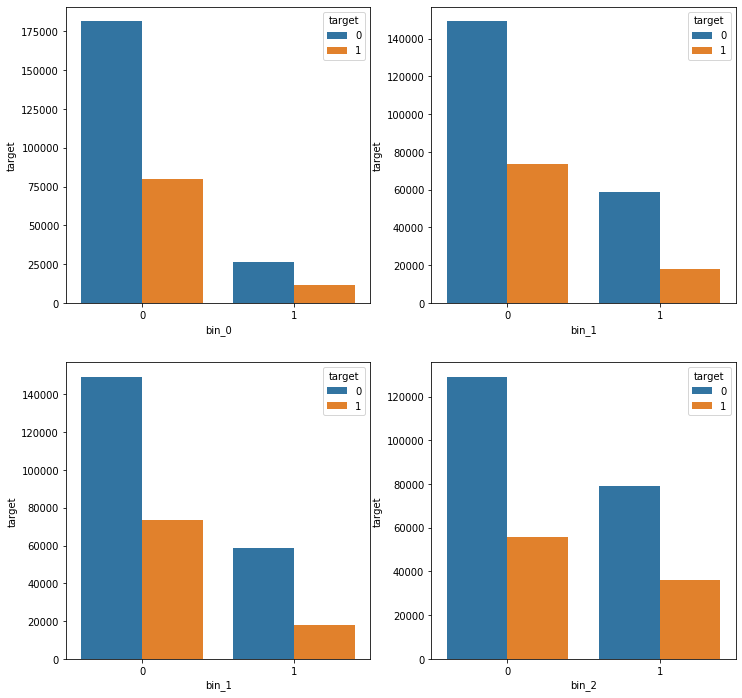

In [10]:
cols=list(df.columns)[1:5]
plt.subplots(nrows=2,ncols=2,figsize=(12,12))
k=1
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k)
        sn.countplot(df[cols[i+j]],hue=df['target'])
        plt.xlabel(cols[i+j])
        plt.ylabel('target')
        k+=1

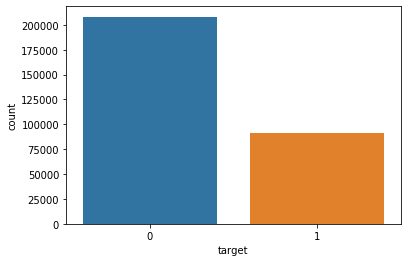

In [11]:
sn.countplot(df.target,)

In [12]:
print(f"% of 1 in target is {(np.sum(df.target)/df.shape[0])*100} and % of 0 in target is {(np.sum(1-df.target)/df.shape[0])*100}")

% of 1 in target is 30.587999999999997 and % of 0 in target is 69.41199999999999


It's imbalance.

In [13]:
from sklearn.model_selection import KFold,GridSearchCV

In [14]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder,OneHotEncoder

In [15]:
labenc=LabelEncoder()

In [16]:
df['bin_3']=df['bin_3'].map({'T':1,'F':0})
df['bin_4']=df['bin_4'].map({'Y':1,'N':0})

In [17]:
df['ord_1'].unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [18]:
ord_en=OrdinalEncoder()

In [19]:
df['ord_1']=df['ord_1'].map({'Grandmaster':5,'Master':4,'Expert':3,'Contributor':2,'Novice':1})

In [20]:
ord_2=OrdinalEncoder()
ord_3=OrdinalEncoder()
ord_4=OrdinalEncoder()
ord_5=OrdinalEncoder()

In [21]:
df['ord_2']=ord_2.fit_transform(df[['ord_2']])

In [22]:
df['ord_3']=ord_3.fit_transform(df[['ord_3']])

In [23]:
df['ord_4']=ord_4.fit_transform(df[['ord_4']])
df['ord_5']=ord_5.fit_transform(df[['ord_5']])

In [24]:
df['month'].unique()

array([ 2,  8,  1,  4, 10,  3,  7,  9, 12, 11,  5,  6], dtype=int64)

In [25]:
df['sin_month']=df['month'].apply(lambda x: np.sin(2*np.pi*(x-1)/11))
df['cos_month']=df['month'].apply(lambda x: np.cos(2*np.pi*(x-1)/11))

In [26]:
df.drop('month',axis=1,inplace=True)

In [27]:
df['day'].unique()

array([2, 7, 5, 4, 3, 1, 6], dtype=int64)

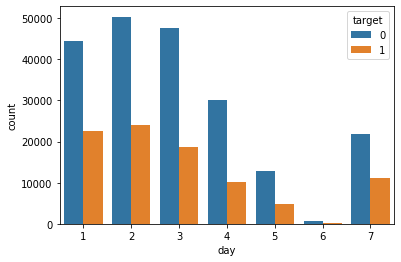

In [28]:
sn.countplot(df['day'],hue=df['target'])

In [29]:
df['sin_day']=df['day'].apply(lambda x: np.sin(2*np.pi*(x-1)/30))
df['cos_day']=df['day'].apply(lambda x: np.cos(2*np.pi*(x-1)/30))

In [30]:
df.drop('day',axis=1,inplace=True
       )

In [31]:
nom_en=OneHotEncoder(sparse=False,drop='first')

In [32]:
a=pd.get_dummies(df,columns=['nom_0','nom_1','nom_2','nom_3','nom_4'],drop_first=True)

In [33]:
nom_0_unique=list(df['nom_0'].unique())
nom_1_unique=list(df['nom_1'].unique())
nom_2_unique=list(df['nom_2'].unique())
nom_3_unique=list(df['nom_3'].unique())
nom_4_unique=list(df['nom_4'].unique())

In [34]:
nom_3_unique

['Finland', 'Russia', 'Canada', 'Costa Rica', 'China', 'India']

In [35]:
a

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,...,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,5,1.0,7.0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,5,3.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,3,4.0,7.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,5,0.0,8.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,5,2.0,0.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,0,0,1,0,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef,1,2,2.0,10.0,...,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
299996,299996,0,0,0,0,1,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8,2,1,2.0,7.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
299997,299997,0,0,0,0,1,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b,3,1,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
299998,299998,0,1,0,0,1,e1558b071,0000ee65f,c8ae4ea14,1f820c7ce,ab0ce192b,1,4,0.0,7.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [36]:
a.drop('id',axis=1,inplace=True)

In [37]:
a

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,...,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,5,1.0,7.0,3.0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,5,3.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,3,4.0,7.0,17.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,5,0.0,8.0,3.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,5,2.0,0.0,17.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef,1,2,2.0,10.0,10.0,...,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
299996,0,0,0,0,1,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8,2,1,2.0,7.0,22.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
299997,0,0,0,0,1,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b,3,1,0.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
299998,0,1,0,0,1,e1558b071,0000ee65f,c8ae4ea14,1f820c7ce,ab0ce192b,1,4,0.0,7.0,22.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [38]:
a['nom_5'].nunique(),a['nom_6'].nunique(),a['nom_7'].nunique(),a['nom_8'].nunique(),a['nom_9'].nunique()

(222, 522, 1220, 2215, 11981)

In [39]:
nom_5_features=list(a['nom_5'].unique())
nom_6_features=list(a['nom_6'].unique())
nom_7_features=list(a['nom_7'].unique())
nom_8_features=list(a['nom_8'].unique())
nom_9_features=list(a['nom_9'].unique())

In [40]:
from tqdm import tqdm

In [41]:
freq_nom_5=[]
for i in tqdm(range(len(nom_5_features))):
    temp_df=a[a['nom_5']==nom_5_features[i]]
    freq_nom_5.append(temp_df.shape[0])
    

100%|██████████| 222/222 [00:04<00:00, 52.37it/s]


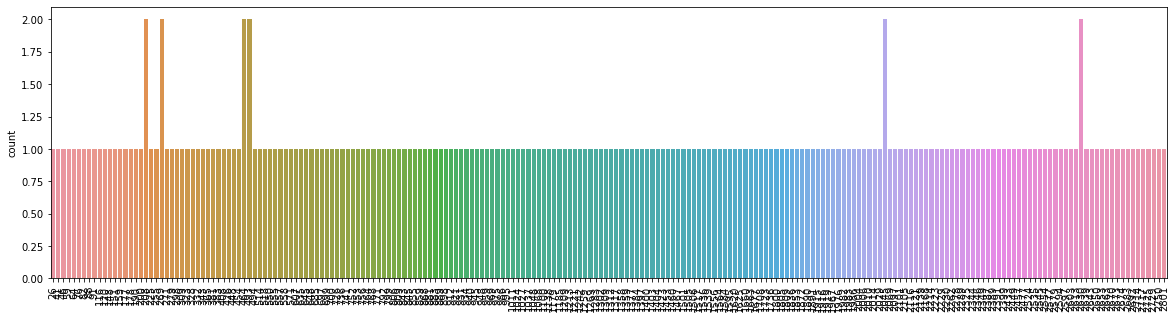

In [42]:
plt.figure(figsize=(20,5))
sn.countplot(freq_nom_5)
plt.xticks(rotation=90)
plt.show()

In [43]:
freq_nom_6=[]
for i in tqdm(range(len(nom_6_features))):
    temp_df=a[a['nom_6']==nom_6_features[i]]
    freq_nom_6.append(temp_df.shape[0])
    

100%|██████████| 522/522 [00:09<00:00, 57.75it/s]


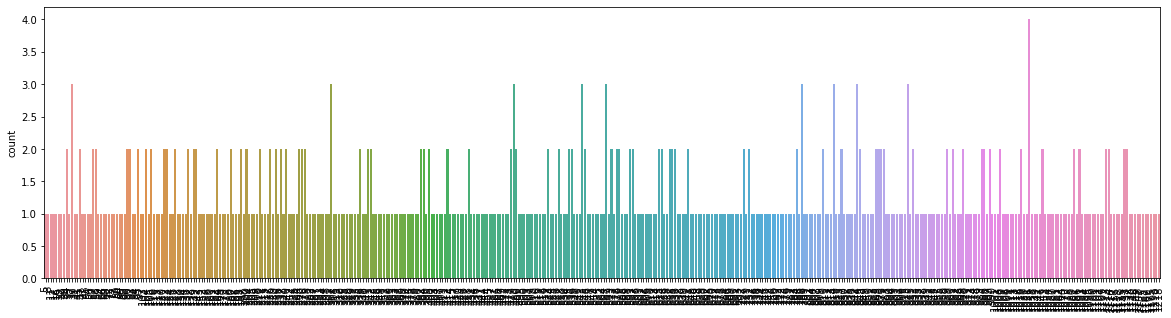

In [44]:
plt.figure(figsize=(20,5))
sn.countplot(freq_nom_6)
plt.xticks(rotation=90)
plt.show()

100%|██████████| 1220/1220 [00:20<00:00, 59.58it/s]


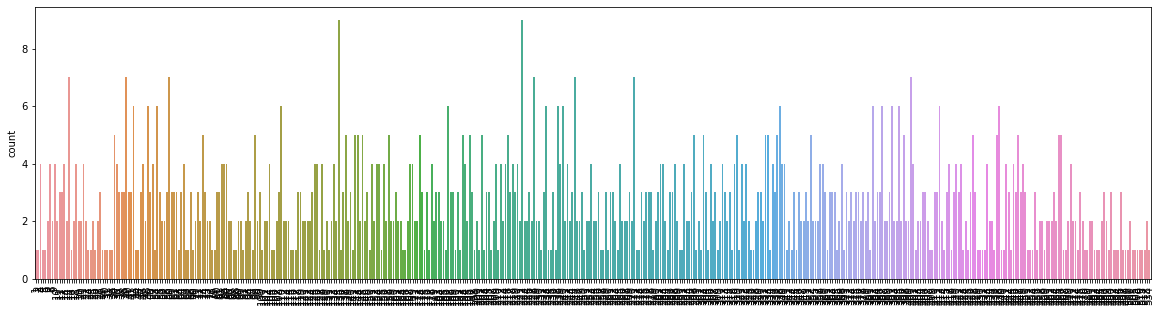

In [45]:
freq_nom_7=[]
for i in tqdm(range(len(nom_7_features))):
    temp_df=a[a['nom_7']==nom_7_features[i]]
    freq_nom_7.append(temp_df.shape[0])
plt.figure(figsize=(20,5))
sn.countplot(freq_nom_7)
plt.xticks(rotation=90)
plt.show()    

100%|██████████| 2215/2215 [00:38<00:00, 58.21it/s]


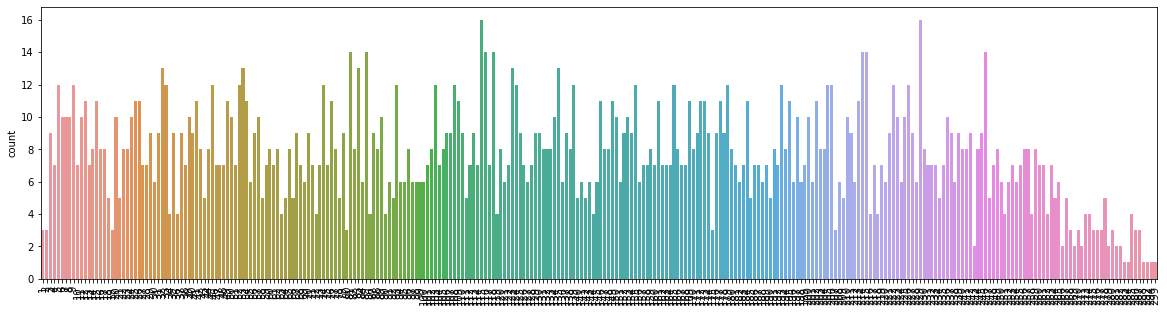

In [46]:
freq_nom_8=[]
for i in tqdm(range(len(nom_8_features))):
    temp_df=a[a['nom_8']==nom_8_features[i]]
    freq_nom_8.append(temp_df.shape[0])
plt.figure(figsize=(20,5))
sn.countplot(freq_nom_8)
plt.xticks(rotation=90)
plt.show()    

100%|██████████| 11981/11981 [04:53<00:00, 40.83it/s]


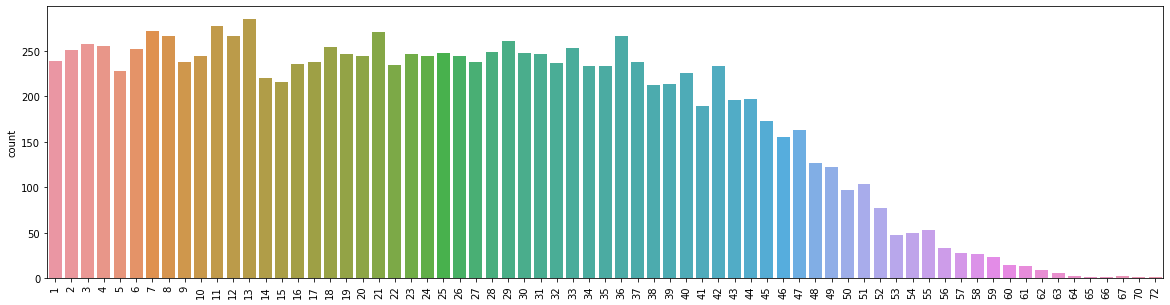

In [47]:
freq_nom_9=[]
for i in tqdm(range(len(nom_9_features))):
    temp_df=a[a['nom_9']==nom_9_features[i]]
    freq_nom_9.append(temp_df.shape[0])
plt.figure(figsize=(20,5))
sn.countplot(freq_nom_9)
plt.xticks(rotation=90)
plt.show()    

for the above features we can apply feature hashing but by applying feature hashing again there will be collisons and we don't know to which domensions we need to reduce the features there we need to tune the parameter and fing the value which is giving best results. But, there are other methods like expanding mean and mean encoding. It is not good to use mean encoding beacuse it causes over fitting problem very easily. so, we xcan use exapanding mean method but for that we need to have data balance which is not in this case. So, I choose frequeny encoding

In [48]:
nom_5_dict=dict()
nom_6_dict=dict()
nom_7_dict=dict()
nom_8_dict=dict()
nom_9_dict=dict()
for i in tqdm(range(len(nom_5_features))):
    nom_5_dict[nom_5_features[i]]=freq_nom_5[i]
for i in tqdm(range(len(nom_6_features))):
    nom_6_dict[nom_6_features[i]]=freq_nom_6[i]
for i in tqdm(range(len(nom_7_features))):
    nom_7_dict[nom_7_features[i]]=freq_nom_7[i]
for i in tqdm(range(len(nom_8_features))):
    nom_8_dict[nom_8_features[i]]=freq_nom_8[i]
for i in tqdm(range(len(nom_9_features))):
    nom_9_dict[nom_9_features[i]]=freq_nom_9[i]


100%|██████████| 11981/11981 [00:00<00:00, 2002389.07it/s]


In [49]:
a['nom_5']=a['nom_5'].map(nom_5_dict)

In [50]:
a['nom_6']=a['nom_6'].map(nom_6_dict)
a['nom_7']=a['nom_7'].map(nom_7_dict)
a['nom_8']=a['nom_8'].map(nom_8_dict)
a['nom_9']=a['nom_9'].map(nom_9_dict)

In [51]:
a.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,...,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,1,1,2594,1148,241,271,19,2,5,1.0,7.0,3.0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,1,1,792,842,287,111,13,1,5,3.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,2524,1169,475,278,29,1,3,4.0,7.0,17.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,975,1175,442,203,44,1,5,0.0,8.0,3.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,2010,1157,436,207,35,1,5,2.0,0.0,17.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [52]:
a.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_5', 'nom_6', 'nom_7',
       'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
       'target', 'sin_month', 'cos_month', 'sin_day', 'cos_day', 'nom_0_Green',
       'nom_0_Red', 'nom_1_Polygon', 'nom_1_Square', 'nom_1_Star',
       'nom_1_Trapezoid', 'nom_1_Triangle', 'nom_2_Cat', 'nom_2_Dog',
       'nom_2_Hamster', 'nom_2_Lion', 'nom_2_Snake', 'nom_3_China',
       'nom_3_Costa Rica', 'nom_3_Finland', 'nom_3_India', 'nom_3_Russia',
       'nom_4_Oboe', 'nom_4_Piano', 'nom_4_Theremin'],
      dtype='object')

In [53]:
columns=['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_5', 'nom_6', 'nom_7',
         'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
         'sin_month', 'cos_month', 'sin_day', 'cos_day', 'nom_0_Green',
         'nom_0_Red', 'nom_1_Polygon', 'nom_1_Square', 'nom_1_Star',
         'nom_1_Trapezoid', 'nom_1_Triangle', 'nom_2_Cat', 'nom_2_Dog',
         'nom_2_Hamster', 'nom_2_Lion', 'nom_2_Snake', 'nom_3_China',
         'nom_3_Costa Rica', 'nom_3_Finland', 'nom_3_India', 'nom_3_Russia',
         'nom_4_Oboe', 'nom_4_Piano', 'nom_4_Theremin']

In [54]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   bin_0             300000 non-null  int64  
 1   bin_1             300000 non-null  int64  
 2   bin_2             300000 non-null  int64  
 3   bin_3             300000 non-null  int64  
 4   bin_4             300000 non-null  int64  
 5   nom_5             300000 non-null  int64  
 6   nom_6             300000 non-null  int64  
 7   nom_7             300000 non-null  int64  
 8   nom_8             300000 non-null  int64  
 9   nom_9             300000 non-null  int64  
 10  ord_0             300000 non-null  int64  
 11  ord_1             300000 non-null  int64  
 12  ord_2             300000 non-null  float64
 13  ord_3             300000 non-null  float64
 14  ord_4             300000 non-null  float64
 15  ord_5             300000 non-null  float64
 16  target            30

In [55]:
x=a.drop(['target'],axis=1).values
y=a['target'].values

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
from imblearn.over_sampling import SMOTE

C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework

In [58]:
smote=SMOTE(sampling_strategy='minority')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
x,y=smote.fit_resample(x,y)

In [61]:
stf=StratifiedKFold(n_splits=5)
for train,test in stf.split(x,y):
    x_train,x_test,y_train,y_test=x[train],x[test],y[train],y[test]

In [62]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log=LogisticRegression(solver='saga')
params={'C':[1,10,100,0.1,0.01]}

In [65]:
grid=GridSearchCV(log,param_grid=params,cv=5,scoring='accuracy',verbose=5)

In [67]:
np.sum(y_train,axis=0)/len(y_train),np.sum(1-y_train)/len(y_train)

(0.5, 0.5)

In [69]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.678, total=   3.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ................................. C=1, score=0.679, total=   3.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] ................................. C=1, score=0.683, total=   3.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s remaining:    0.0s


[CV] ................................. C=1, score=0.700, total=   3.4s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.2s remaining:    0.0s


[CV] ................................. C=1, score=0.697, total=   3.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.678, total=   3.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.679, total=   3.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.683, total=   3.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.700, total=   3.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.697, total=   3.3s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.678, total=   3.6s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 0.1, 0.01]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=5)

In [70]:
best_log=grid.best_estimator_

In [71]:
best_log.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
best_log.coef_

array([[ 0.00376061, -0.24392709,  0.03222362, -0.02852338, -0.1223236 ,
         0.0158274 , -0.00093904, -0.00638089,  0.00080635,  0.00739758,
         0.24034103,  0.38698289,  0.08567048,  0.36459322,  0.43306487,
         0.46713384, -0.15584962, -0.06980467, -0.39974718, -0.36684605,
         0.25453479,  0.28267766,  0.13546348,  0.20558525,  0.13724089,
         0.12232384,  0.20666917,  0.04113344, -0.14394691,  0.071792  ,
        -0.07793717, -0.02261894, -0.0538607 , -0.04235881, -0.18603389,
         0.03956972, -0.13348847,  0.25527924,  0.182606  ,  0.26587377]])

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve

In [74]:
predictions=best_log.predict(x_test)


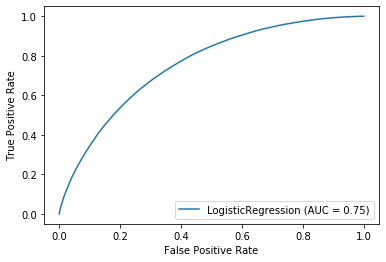

In [75]:
plot_roc_curve(best_log,x_train,y_train)

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     41647
           1       0.69      0.72      0.70     41647

    accuracy                           0.70     83294
   macro avg       0.70      0.70      0.70     83294
weighted avg       0.70      0.70      0.70     83294



In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=250,oob_score=True,bootstrap=True)
params={'max_depth':[5,6,7,8,9],'min_samples_split':[2,5,10,20,40,50]}

In [81]:
random=RandomizedSearchCV(rfc,param_distributions=params,cv=5,verbose=5,scoring='accuracy')
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=5, max_depth=6 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... min_samples_split=5, max_depth=6, score=0.595, total= 1.3min
[CV] min_samples_split=5, max_depth=6 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] .... min_samples_split=5, max_depth=6, score=0.591, total= 1.2min
[CV] min_samples_split=5, max_depth=6 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] .... min_samples_split=5, max_depth=6, score=0.686, total= 1.2min
[CV] min_samples_split=5, max_depth=6 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.7min remaining:    0.0s


[CV] .... min_samples_split=5, max_depth=6, score=0.892, total= 1.2min
[CV] min_samples_split=5, max_depth=6 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV] .... min_samples_split=5, max_depth=6, score=0.891, total= 1.1min
[CV] min_samples_split=20, max_depth=8 ...............................
[CV] ... min_samples_split=20, max_depth=8, score=0.587, total= 1.5min
[CV] min_samples_split=20, max_depth=8 ...............................
[CV] ... min_samples_split=20, max_depth=8, score=0.585, total= 1.4min
[CV] min_samples_split=20, max_depth=8 ...............................
[CV] ... min_samples_split=20, max_depth=8, score=0.689, total= 1.4min
[CV] min_samples_split=20, max_depth=8 ...............................
[CV] ... min_samples_split=20, max_depth=8, score=0.900, total= 1.3min
[CV] min_samples_split=20, max_depth=8 ...............................
[CV] ... min_samples_split=20, max_depth=8, score=0.901, total= 1.5min
[CV] min_samples_split=20, max_depth=9 ...............................
[CV] ... min_samples_split=20, max_depth=9, score=0.583, total= 1.7min
[CV] min_samples_split=20, max_depth=9 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 105.6min finished


[CV] ... min_samples_split=10, max_depth=7, score=0.897, total= 1.3min


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [82]:
best_forest=random.best_estimator_
best_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

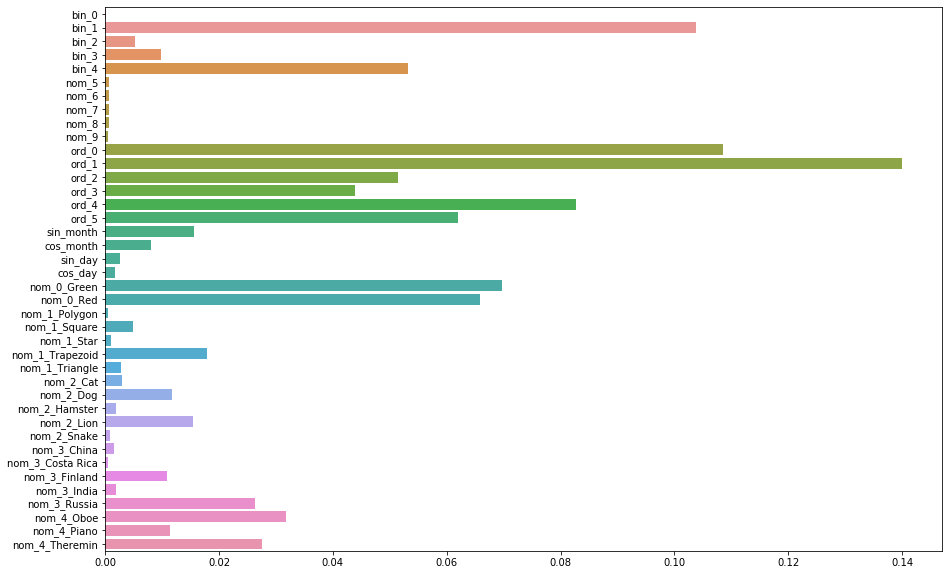

In [83]:
plt.figure(figsize=(15,10))
sn.barplot(best_forest.feature_importances_,columns)

In [88]:
best_forest

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)>

In [89]:
predictions=best_forest.predict(x_test)


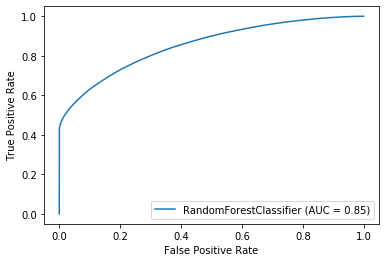

In [91]:
plot_roc_curve(best_forest,x_train,y_train)

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     41647
           1       0.90      1.00      0.95     41647

    accuracy                           0.94     83294
   macro avg       0.95      0.94      0.94     83294
weighted avg       0.95      0.94      0.94     83294



In [97]:
best_forest.oob_score_

0.7624242897190091

checking whether increasing in trees causing any increse in performance.
OOB_score is the error which is calculated by using not used data when fitting the model

100%|██████████| 5/5 [06:45<00:00, 81.12s/it]


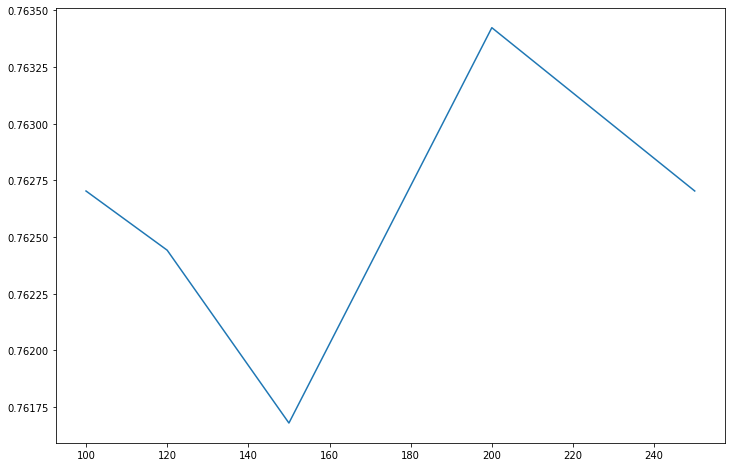

In [98]:
l=[100,120,150,200,250]
oob_score_list=[]
for i in tqdm(range(len(l))):
    temp_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                      criterion='gini', max_depth=9, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=20,
                                      min_weight_fraction_leaf=0.0, n_estimators=l[i],
                                      n_jobs=None, oob_score=True, random_state=None,
                                      verbose=0, warm_start=False)
    temp_model.fit(x_train,y_train)
    oob_score_list.append(temp_model.oob_score_)
plt.figure(figsize=(12,8))
plt.plot(l,oob_score_list)
    

we can see that oob_score is high when n_estimators equal to 200

In [71]:
finalmodel=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                      criterion='gini', max_depth=9, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=20,
                                      min_weight_fraction_leaf=0.0, n_estimators=200,
                                      n_jobs=None, oob_score=True, random_state=None,
                                      verbose=0, warm_start=False)

In [72]:
finalmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

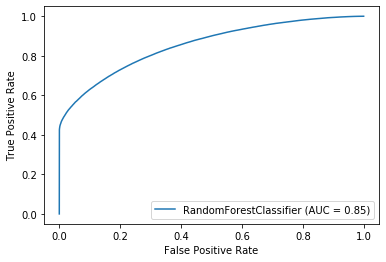

In [73]:
predictions=finalmodel.predict(x_test)
plot_roc_curve(finalmodel,x_train,y_train)

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     41647
           1       0.89      1.00      0.94     41647

    accuracy                           0.94     83294
   macro avg       0.95      0.94      0.94     83294
weighted avg       0.95      0.94      0.94     83294



we can see that there is no much change in having trees 250 and 200 almost both are giving same classification report and roc_auc_score is same

In [106]:
import pickle

In [107]:
with open('categorical_model.pkl','wb') as f:
    pickle.dump(finalmodel,f)

In [108]:
with open('categorical_model.pkl','rb') as f:
    model_loaded=pickle.load(f)

In [109]:
with open('categorical_model_transformations','wb') as f:
    pickle.dump(scaler,f)
with open('categorical_model_transformations','rb') as f:
    trans=pickle.load(f)
with open('categorical_model_ord0','wb') as f:
    pickle.dump(ord_en,f)
with open('categorical_model_ord2','wb') as f:
    pickle.dump(ord_2,f)
with open('categorical_model_ord3','wb') as f:
    pickle.dump(ord_3,f)
with open('categorical_model_ord_4','wb') as f:
    pickle.dump(ord_4,f)
with open('categorical_model_ord_5','wb') as f:
    pickle.dump(ord_5,f)
    